# Image Classification with Deep Neural Networks Part Two

First of all: Congrats to making it here. You have almost completed the Data Science Accelerator!

As the last step on this journey and hopefully the first on your AI and advanced Data Science journey we will again use Deep Neural Networks to classify images. This time however we want some color! And after we've basically seen how what we've learned can be transferred to more complex images we will tackle a dataset with cute dogs! (cats optional?)

You will notice that this notebook contains more **NOW YOU** sections and less explanations. If you feel stuck or want more information remember to check the docs, forums/google and of course our Slack Channel!

Now as usual we will be using fast.ai run the code below for the necessary setup.
Also remember what you've learned about GPUs.

In [1]:
!pip install -Uqq fastbook
from fastai.vision.all import *

     |████████████████████████████████| 727kB 4.9MB/s 
     |████████████████████████████████| 194kB 10.1MB/s 
     |████████████████████████████████| 1.2MB 13.3MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 61kB 6.4MB/s 


#### NOW YOU

Use the functions you've come across in the last notebook to load the data from 'URLs.CIFAR' into your path

In [3]:
path = untar_data(URLs.CIFAR) #NOW YOU PART

#### NOW YOU 
Check the folder structure of your path object. How many folder are there? What are their names?


In [4]:
path.ls()#NOW YOU PART

(#3) [Path('/root/.fastai/data/cifar10/train'),Path('/root/.fastai/data/cifar10/labels.txt'),Path('/root/.fastai/data/cifar10/test')]

- Number of Folders: ...
- Names: ...

Now we need to load the data and process it in a way that our model (NN) can work with. As you know fast.ai provides the DataBlock API which makes it relativly easy to specify how the data should be loaded and processed.

#### NOW YOU
You've seen how the DataBlock worked for the MNIST dataset. Try to use it here to create a Datablock called images.


If you are completely stuck, check the fast.ai docs. If this still doesn't help, no worries, just as in Slack!

In [5]:
images = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label) #NOW YOU PART

#### NOW YOU

Use the `.dataloaders()` method to load the training data from the respective folder.

In [6]:
dls = images.dataloaders(path/"train") #NOW YOU PART

#### NOW YOU
Show a batch of the loaded validation data.

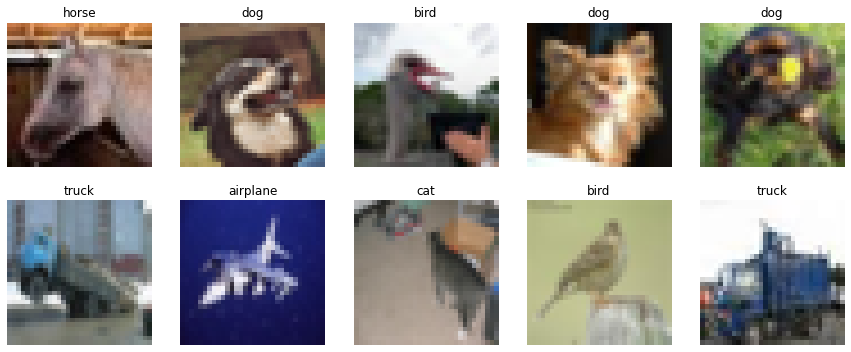

In [7]:
dls.valid.show_batch(max_n=10, nrows=2)#NOW YOU PART

#### NOW YOU
Show a batch of the loaded training data.

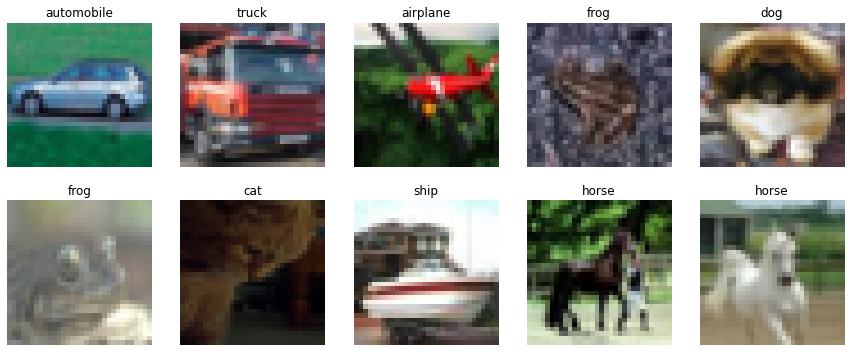

In [ ]:
dls.train.show_batch(max_n= 10, nrows = 2)#NOW YOU PART

If you see some very bad quality images of things like airplanes, cats, dogs etc. you've done everything correct so far!

#### NOW YOU

Create a learner (just like you saw in the MNIST example) and set the metrics to accuracy. This time **do not** pass 'pretrained = False'.

In [8]:
#resnet18
learner = cnn_learner(dls,resnet18, metrics = accuracy) #NOW YOU PART

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


#### NOW YOU

Use fast.ai's `fine_tune()` method to train the model for 10 epochs. (If your progress bar is not moving at all check whether you have your GPU activated)

In [9]:
learner.fine_tune(10)#NOW YOU PART

epoch,train_loss,valid_loss,accuracy,time
0,1.776538,1.557681,0.442500,01:23


epoch,train_loss,valid_loss,accuracy,time
0,1.187573,1.066007,0.620700,01:27
1,0.904747,0.841564,0.705600,01:27
2,0.760816,0.734155,0.748700,01:27
3,0.563067,0.691026,0.766500,01:27
4,0.431917,0.712833,0.769300,01:28
5,0.280607,0.787600,0.772700,01:27
6,0.185342,0.867488,0.771100,01:29
7,0.119771,0.920784,0.776100,01:29
8,0.079860,0.965483,0.777600,01:29
9,0.058143,0.967557,0.778500,01:29


As you can see the results are OK, but far from the accuracy we received for our MNIST example.
Their are many ways to boost this accuracy (without overfitting). You could for example augment your images, or use a different (larger) neural network architecture.

We won't cover augmentation here as it takes up an important part of our AI track. But using a larger/different network is as easy as changing resnet18 to another architecture provided by fast.ai like resnet34.

#### NOW YOU 
Create a learner like above with the resnet34 architecture and train it like the learner with the resnet18 architecture.

In [10]:
learner_2 = cnn_learner(dls, resnet34, metrics = accuracy)#NOW YOU PART

learner_2.fine_tune(10)#NOW YOU PART

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.704322,1.509035,0.469200,01:39


epoch,train_loss,valid_loss,accuracy,time
0,1.110356,0.951943,0.665000,01:52
1,0.841154,0.753774,0.737400,01:51
2,0.653373,0.669656,0.768800,01:49
3,0.524618,0.630745,0.788500,01:49
4,0.359293,0.655793,0.787500,01:51


epoch,train_loss,valid_loss,accuracy,time
0,1.110356,0.951943,0.665000,01:52
1,0.841154,0.753774,0.737400,01:51
2,0.653373,0.669656,0.768800,01:49
3,0.524618,0.630745,0.788500,01:49
4,0.359293,0.655793,0.787500,01:51
5,0.218310,0.703076,0.798100,01:51
6,0.118870,0.814649,0.796700,01:53
7,0.069030,0.885094,0.797600,01:54
8,0.038615,0.911950,0.804300,01:52
9,0.033129,0.911473,0.802800,01:52


As you can see we get results that are a bit better yet we are still far from the accuracy we received when training on the MNIST data. Our task is harder, yet not unsolveable. If you want to find out how to further tune your network, how to augment your images so that your network may generalize better, stick around and join the AI track!

## BONUS

Use what you have learned on other dataset's such as the Pets Dataset below.
This is just an example, feel free to experiment and classify whatever you want.


You can find and retrieve the Pets dataset using URLs.PETS in the usual workflow.

- 1st Hint: the labelling is based on upper and lowercase names. Use the `label_func` below when loading and preparing your image data.
Now the label will be True for cats and False for dogs. (We've essentially created a cat classifier, if you like dogs better, change the label function accordingly)
- 2nd Hint: So far all of our images have been of a set size (e.g. 28x28 for MNIST). The PETS images vary in size. Integrate `item_tfms=Resize(224)` into your DataBlock or ImageDataLoaders to resize them all to one size.

From here on we will provide bits of code and you can fill in the blanks. No more **NOW YOU** instructions. This is **your** journey.

In [11]:
#possible solution
path = untar_data(URLs.PETS) 
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [12]:
def label_func(f): return f[0].isupper()

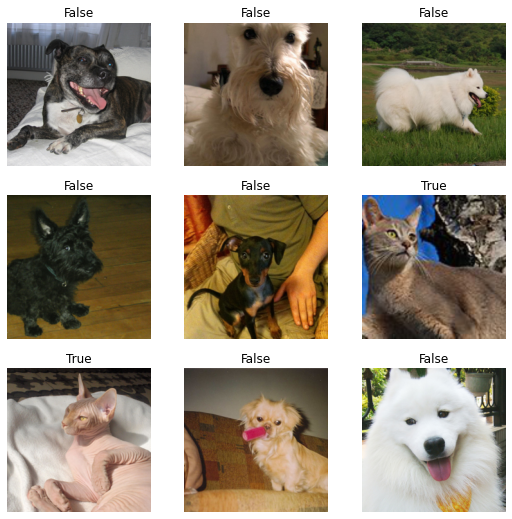

In [14]:
#possible solution
files = get_image_files(path/"images")
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))
dls.show_batch()

In [15]:
#possible solution
learner = cnn_learner(dls, resnet34, metrics=accuracy)
learner.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.157046,0.014929,0.993911,01:04


epoch,train_loss,valid_loss,accuracy,time
0,0.064266,0.039832,0.989175,01:17
1,0.027447,0.007439,0.997970,01:16


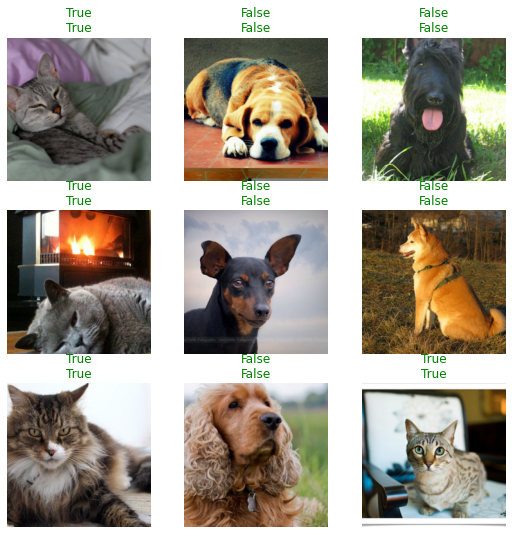

In [16]:
#one way to show results
learner.show_results()

## BONUS Part Two

Create a classifier for the PETS dataset, but this time for all breeds.

- Hint: use the regex expression to extract the breed names as labels.

In [17]:
pat = r'^(.*)_\d+.jpg'

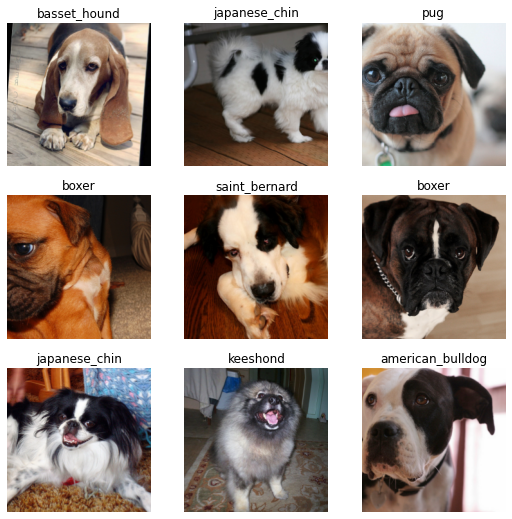

In [18]:
#possible solution
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))
dls.show_batch()

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.00363078061491251)

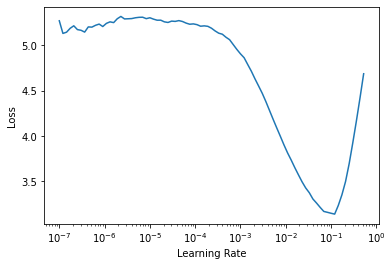

In [19]:
#possible solution
learner = cnn_learner(dls, resnet34, metrics=accuracy)
learner.lr_find()

In [20]:
lr = 0.02

In [21]:
learner.fine_tune(2,lr)

epoch,train_loss,valid_loss,accuracy,time
0,1.043698,0.725910,0.841001,01:28


epoch,train_loss,valid_loss,accuracy,time
0,1.656394,1.359140,0.645467,01:34
1,0.797424,0.387877,0.884303,01:33


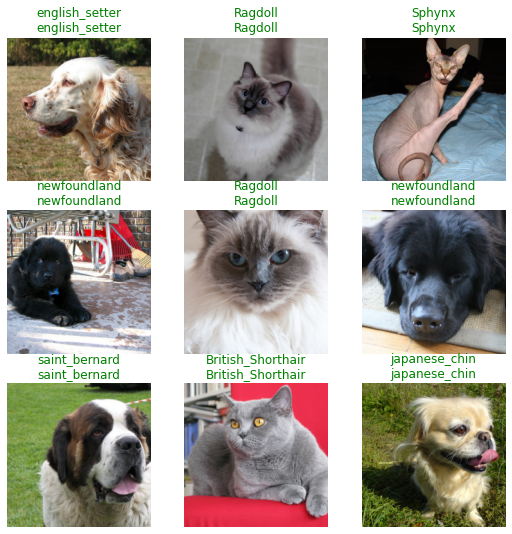

In [22]:
learner.show_results()